#  <span style="color:orange">INFO40975 Artifical Intelligence - Research Project </span>

<h3>Madhav Jaisankar</h3>
<h4>991522670</h4>
<h5>Red wine data - Classification</h5>
<h5>Dec 6th, 2021</h5>

In [ ]:
!pip install pycaret  #installing pycaret

     |████████████████████████████████| 288 kB 5.0 MB/s 
     |████████████████████████████████| 261 kB 41.9 MB/s 
     |████████████████████████████████| 2.0 MB 50.5 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 113 kB 36.2 MB/s 
     |████████████████████████████████| 6.8 MB 40.4 MB/s 
     |████████████████████████████████| 167 kB 71.9 MB/s 
     |████████████████████████████████| 1.3 MB 70.5 MB/s 
     |████████████████████████████████| 15.5 MB 44.4 MB/s 
     |████████████████████████████████| 86 kB 4.6 MB/s 
     |████████████████████████████████| 1.7 MB 60.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 596 kB 54.3 MB/s 
     |████████████████████████████████| 675 kB 58.6 MB/s 
     |████████████████████████████████| 102 kB 10.9 MB/s 
     |█████████████████

In [ ]:
# google colab specific code
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [45]:
import pandas as pd
import numpy as np

#loading red wine data csv file
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [48]:
# converting quality column to categorical type
df['quality'] = df['quality'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.3 KB


In [49]:
# shape of the dataset
df.shape

(1599, 12)

In [50]:
# making a section of the unseen data (that will be used for predictions)
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1439, 12)
Unseen Data For Predictions: (160, 12)


In [51]:
# setting up pycaret environment
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'quality', session_id=123) 

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original Data,"(1439, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [52]:
# comparing models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6852,0.6716,0.3763,0.6557,0.6654,0.4908,0.4950,0.569
et,Extra Trees Classifier,0.6545,0.6757,0.3552,0.6269,0.6347,0.4394,0.4438,0.513
lightgbm,Light Gradient Boosting Machine,0.6445,0.6566,0.3572,0.6221,0.6296,0.4304,0.4332,0.428
gbc,Gradient Boosting Classifier,0.6425,0.6404,0.3661,0.6236,0.6285,0.4295,0.4328,1.212
lr,Logistic Regression,0.5958,0.6029,0.2751,0.5572,0.5663,0.3314,0.3369,0.956
lda,Linear Discriminant Analysis,0.5948,0.6090,0.3285,0.5740,0.5810,0.3536,0.3556,0.019
ridge,Ridge Classifier,0.5859,0.0000,0.2480,0.5008,0.5307,0.2974,0.3083,0.015
dt,Decision Tree Classifier,0.5749,0.5469,0.3395,0.5758,0.5726,0.3412,0.3429,0.022
qda,Quadratic Discriminant Analysis,0.5393,0.5728,0.3516,0.5460,0.5373,0.2958,0.2986,0.020
ada,Ada Boost Classifier,0.5322,0.4855,0.2675,0.4505,0.4759,0.2189,0.2323,0.134


In [53]:
# model of random forest classifier
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6931,0.8497,0.3328,0.6580,0.6738,0.5102,0.5125
1,0.6931,0.8575,0.3427,0.6601,0.6751,0.5074,0.5097
2,0.6733,0.8040,0.4876,0.6498,0.6547,0.4678,0.4724
3,0.6634,0.7969,0.3577,0.6306,0.6465,0.4633,0.4646
4,0.6733,0.8243,0.3403,0.6441,0.6490,0.4694,0.4804
5,0.6634,0.8365,0.3076,0.6332,0.6336,0.4414,0.4488
6,0.7624,0.8943,0.3782,0.7219,0.7409,0.6195,0.6218
7,0.6000,0.0000,0.3362,0.5633,0.5795,0.3458,0.3478
8,0.7400,0.0000,0.5298,0.7412,0.7306,0.5813,0.5872
9,0.6900,0.8526,0.3500,0.6550,0.6705,0.5021,0.5050


In [54]:
# model of extra trees classifier
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6634,0.8587,0.3212,0.6282,0.6451,0.4610,0.4623
1,0.6535,0.8501,0.2997,0.6148,0.6307,0.4361,0.4396
2,0.6337,0.8293,0.4709,0.6128,0.6139,0.4022,0.4092
3,0.6634,0.8126,0.3579,0.6373,0.6484,0.4619,0.4647
4,0.6238,0.8447,0.3015,0.5995,0.6007,0.3786,0.3839
5,0.6436,0.8408,0.2993,0.6200,0.6167,0.4115,0.4184
6,0.6634,0.8694,0.3278,0.6346,0.6441,0.4638,0.4690
7,0.6100,0.0000,0.3411,0.5744,0.5901,0.3623,0.3645
8,0.7100,0.0000,0.5047,0.7073,0.7005,0.5353,0.5414
9,0.6800,0.8514,0.3281,0.6404,0.6565,0.4814,0.4854


In [55]:
# model of light gradient boosting machine classifier
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6832,0.8247,0.3391,0.6574,0.6679,0.4925,0.4952
1,0.6139,0.8178,0.3018,0.6016,0.6049,0.3857,0.3883
2,0.6535,0.8138,0.4795,0.6441,0.6421,0.4422,0.4458
3,0.6238,0.7831,0.3416,0.6010,0.6112,0.4123,0.4130
4,0.6040,0.7973,0.3026,0.5783,0.5852,0.3617,0.3669
5,0.6733,0.8350,0.3315,0.6362,0.6528,0.4735,0.4759
6,0.6931,0.8746,0.3498,0.6667,0.6769,0.5195,0.5223
7,0.5600,0.0000,0.3052,0.5301,0.5409,0.2781,0.2802
8,0.6900,0.0000,0.5051,0.6832,0.6822,0.5049,0.5072
9,0.6500,0.8193,0.3160,0.6220,0.6317,0.4338,0.4369


In [56]:
# tuning model of random forest classifier
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5545,0.7145,0.3366,0.5564,0.5506,0.3210,0.3236
1,0.5842,0.7148,0.2634,0.5613,0.5585,0.3115,0.3177
2,0.5149,0.6761,0.2506,0.4864,0.4910,0.2103,0.2160
3,0.5248,0.7003,0.2999,0.5076,0.5057,0.2611,0.2671
4,0.5149,0.7014,0.2571,0.4854,0.4989,0.2216,0.2226
5,0.5842,0.6952,0.2745,0.5375,0.5562,0.3244,0.3290
6,0.6139,0.7627,0.4508,0.5825,0.5951,0.3837,0.3856
7,0.5500,0.0000,0.3352,0.5231,0.5246,0.2741,0.2835
8,0.5900,0.0000,0.3707,0.5636,0.5738,0.3538,0.3564
9,0.5600,0.7129,0.3238,0.5852,0.5536,0.3023,0.3153


In [57]:
# tuning model of extra trees classifier
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6634,0.8115,0.3033,0.6235,0.6348,0.4453,0.4520
1,0.6238,0.8022,0.2696,0.6335,0.5838,0.3659,0.3769
2,0.5248,0.7122,0.2372,0.4879,0.4949,0.2123,0.2172
3,0.5842,0.7725,0.2757,0.5666,0.5613,0.3107,0.3157
4,0.5545,0.7647,0.2618,0.5205,0.5180,0.2598,0.2732
5,0.6238,0.7861,0.2718,0.6238,0.5838,0.3665,0.3766
6,0.6634,0.8369,0.2786,0.5872,0.6160,0.4393,0.4483
7,0.6000,0.0000,0.3124,0.5753,0.5663,0.3263,0.3332
8,0.6600,0.0000,0.3637,0.6616,0.6333,0.4347,0.4439
9,0.5600,0.7883,0.2535,0.5371,0.5352,0.2716,0.2763


In [58]:
# tuning model of light gradient boosting machine classifier
tuned_lgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7030,0.8062,0.3289,0.6637,0.6777,0.5139,0.5184
1,0.6238,0.8161,0.2616,0.5823,0.5784,0.3678,0.3786
2,0.6337,0.7829,0.2908,0.6135,0.6047,0.3905,0.3993
3,0.5842,0.7683,0.2757,0.5680,0.5620,0.3110,0.3161
4,0.5941,0.8018,0.2687,0.5948,0.5583,0.3169,0.3313
5,0.6337,0.7987,0.2556,0.5177,0.5691,0.3764,0.3915
6,0.7228,0.8686,0.3225,0.6704,0.6838,0.5404,0.5502
7,0.5900,0.0000,0.3079,0.5571,0.5603,0.3133,0.3196
8,0.6600,0.0000,0.3743,0.6458,0.6388,0.4402,0.4477
9,0.6400,0.8342,0.2947,0.6212,0.6132,0.4035,0.4105


In [59]:
print("------Model object of random forest classifier------\n")
print(rf)
print("\n------Tuned model object of random forest classifier------\n")
print(tuned_rf)

------Model object of random forest classifier------

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

------Tuned model object of random forest classifier------

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples

In [60]:
print("------Model object of extra trees classifier------\n")
print(et)
print("\n------Tuned model object of extra trees classifier------\n")
print(tuned_et)

------Model object of extra trees classifier------

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

------Tuned model object of extra trees classifier------

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                  

In [61]:
print("------Model object of light gradient boosting machine classifier------\n")
print(lgbm)
print("\n------Tuned model object of light gradient boosting machine classifier------\n")
print(tuned_lgbm)

------Model object of light gradient boosting machine classifier------

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

------Tuned model object of light gradient boosting machine classifier------

LGBMClassifier(bagging_fraction=1.0, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=60, objective=None,
       

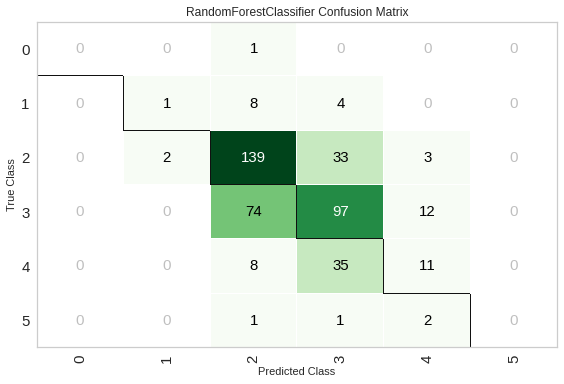

In [62]:
# confusion matrix, tuned random forest
plot_model(tuned_rf, plot = 'confusion_matrix')

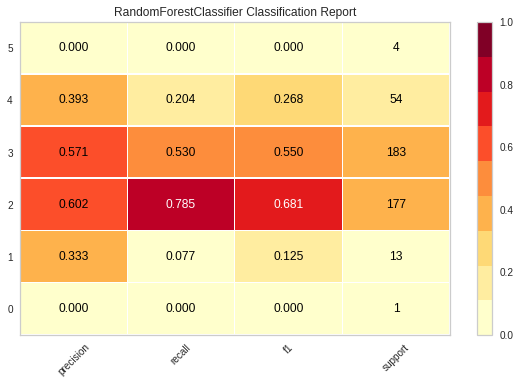

In [63]:
# classification report, tuned random forest
plot_model(tuned_rf, plot="class_report")

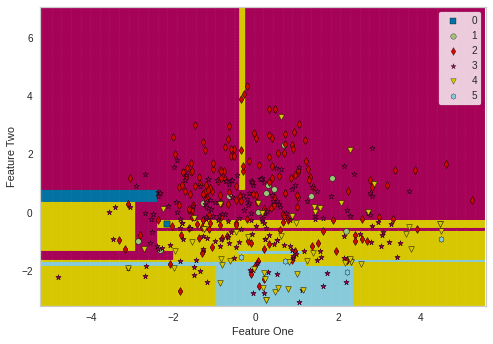

In [64]:
# decision boundary plot, tuned random forest
plot_model(tuned_rf, plot='boundary')

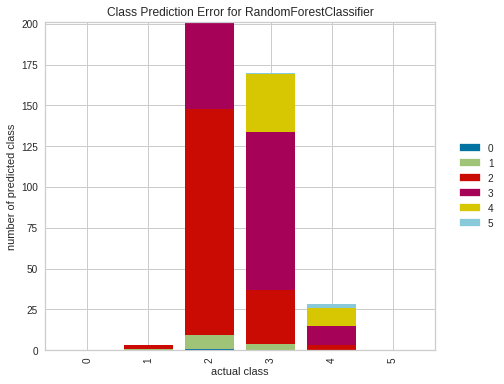

In [65]:
# prediction error plot, tuned random forest 
plot_model(tuned_rf, plot='error')

In [66]:
# display all the available plots for the tuned random forest mdoel
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [67]:
# predicting on the previously separated sample on the tuned random forest model
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5741,0.7016,0.266,0.5474,0.5493,0.297,0.3029


Accuracy from the test set is **`0.5741`** compared to the **`0.5591`** seen in the `tuned_rf` results from the tuned random forest test. Because the difference is quite minimal, overfitting is most likely not an issue here.

In [68]:
# Finalizing model for deployment
final_rf = finalize_model(tuned_rf)

In [69]:
print(final_rf )

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [71]:
# predicting with the previously allocated "unseen dataset"
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5,0.6178
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,5,0.5946
2,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,5,0.6178
3,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,6,0.5890
4,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,5,0.8974


In [72]:
# saving the finalized random forest model
save_model(final_rf,'Final Random Forest Model 06Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_features=1.0,
                                         max_leaf_

In [73]:
# loading and using the saved model to predict with data_unseen
saved_final_rf = load_model('Final Random Forest Model 06Dec2021')
new_prediction = predict_model(saved_final_rf, data=data_unseen)

new_prediction.head()

Transformation Pipeline and Model Successfully Loaded


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5,0.6178
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,5,0.5946
2,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,5,0.6178
3,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,6,0.5890
4,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,5,0.8974
